# 1 Ploting the functions:

In [64]:
def f(x):
  return x**2

Text(0, 0.5, 'f(x)')

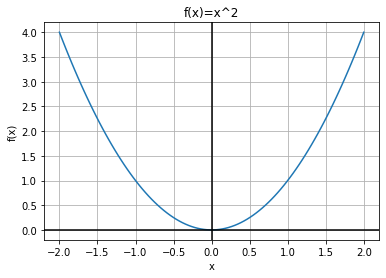

In [65]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$f(x)=x^2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')


In [66]:
def g(x):
  return (x-1)**2

Text(0, 0.5, '$g(x)$')

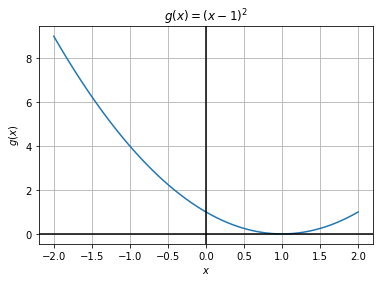

In [82]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,g(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$g(x)=(x-1)^2$')
plt.xlabel('$x$')
plt.ylabel('$g(x)$')


In [68]:
def h(x):
  return x**2 -1

Text(0, 0.5, '$h(x)$')

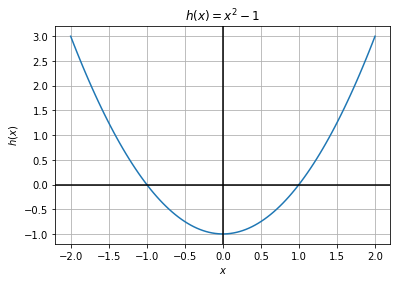

In [83]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,h(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$h(x)=x^2-1$')
plt.xlabel('$x$')
plt.ylabel('$h(x)$')


In [70]:
def j(x):
  return x**2+1

Text(0, 0.5, '$j(x)$')

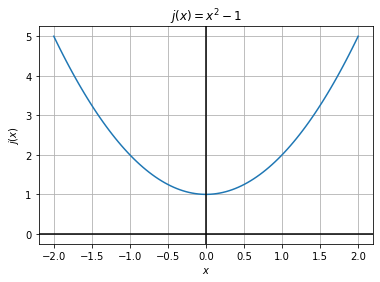

In [84]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,j(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('$j(x)=x^2-1$')
plt.xlabel('$x$')
plt.ylabel('$j(x)$')


# 2. Solving by classic method angd Pho Shen Loh's method


In [72]:
import cmath as cmt
def poshenLoh(a,b,c):
  B=b/a;
  C=c/a;
  u1=cmt.sqrt((B/2)**2-C);
  u2=-cmt.sqrt((B/2)**2-C);
  x1=(-B/2)+u1
  x2=(-B/2)+u2
  return x1,x2

In [73]:
import math as mt
def quadraticClassic(a,b,c):
  disc=b**2-4*a*c
  if disc<0:
    root=mt.sqrt(-disc)*(0+1j)
  else:
    root=mt.sqrt(disc)
  x1=(-b+root)/(2*a)
  x2=(-b-root)/(2*a)
  return x1,x2

In [74]:
print("Roots of the polynomial x^2 ")
a=quadraticClassic(1,0,0)
print("By clasic method: ", a)
b=poshenLoh(1,0,0)
print("By Pho Shen Loh method: ", b)

Roots of the polynomial x^2 
By clasic method:  (0.0, 0.0)
By Pho Shen Loh method:  (0j, (-0+0j))


In [75]:
print("Roots of the polynomial (x-1)^2 ")
a=quadraticClassic(1,-2,1)
print("By clasic method: ", a)
b=poshenLoh(1,-2,1)
print("By Pho Shen Loh method: ", b)

Roots of the polynomial (x-1)^2 
By clasic method:  (1.0, 1.0)
By Pho Shen Loh method:  ((1+0j), (1+0j))


In [76]:
print("Roots of the polynomial x^2-1 ")
a=quadraticClassic(1,0,-1)
print("By clasic method: ", a)
b=poshenLoh(1,0,-1)
print("By Pho Shen Loh method: ", b)

Roots of the polynomial x^2-1 
By clasic method:  (1.0, -1.0)
By Pho Shen Loh method:  ((1+0j), (-1+0j))


In [77]:
print("Roots of the polynomial x^2+1 ")
a=quadraticClassic(1,0,1)
print("By clasic method: ", a)
b=poshenLoh(1,0,1)
print("By Pho Shen Loh method: ", b)

Roots of the polynomial x^2+1 
By clasic method:  (1j, -1j)
By Pho Shen Loh method:  (1j, (-0-1j))



# Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [105]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0
    r2 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal $f(x)=Z^2$')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


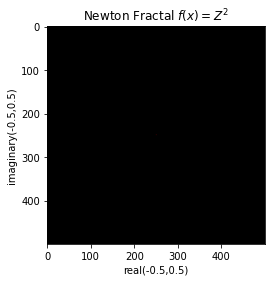

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


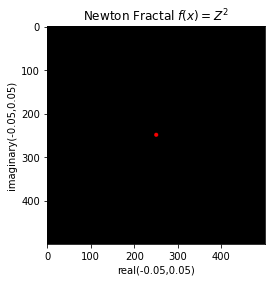

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


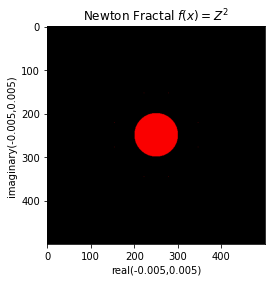

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


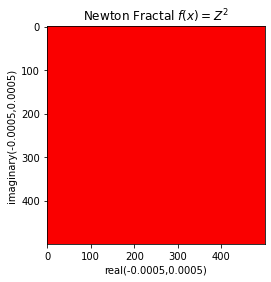

In [106]:
print("zoom out")
display1(zoom=1)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

In [107]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return (z-1) ** 2 

def df(z):
    return 2 * (z-1)

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal $f(x)=(Z-1)^2$')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


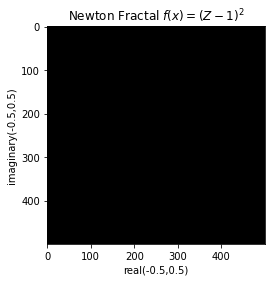

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


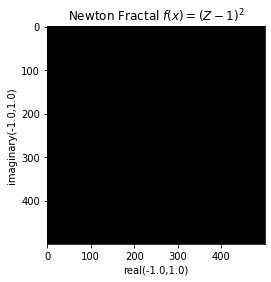

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


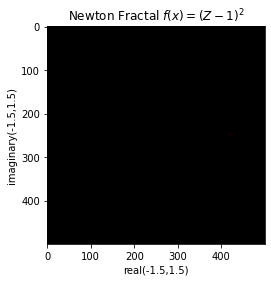

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


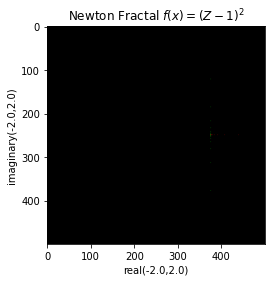

In [108]:
print("zoom in")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)

In [109]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 -1

def df(z):
    return 2*z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal $f(x)=Z^2-1$')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


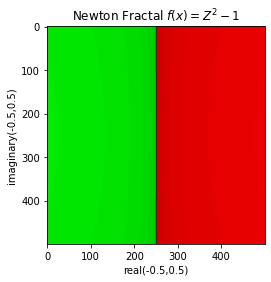

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


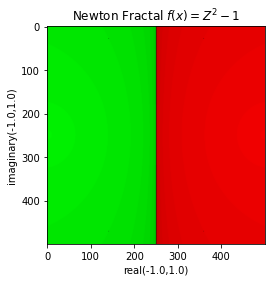

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


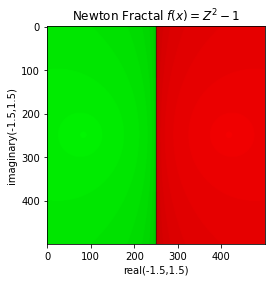

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


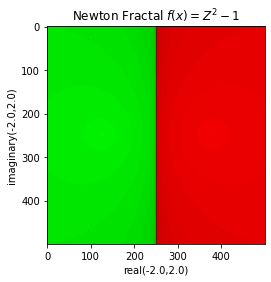

In [110]:
print("zoom in")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)

In [111]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 +1

def df(z):
    return 2*z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1j
    r2 = -1j

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal $f(x)=Z^2-1$')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


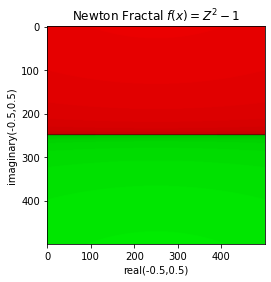

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


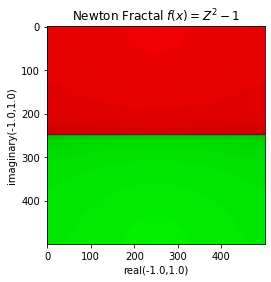

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


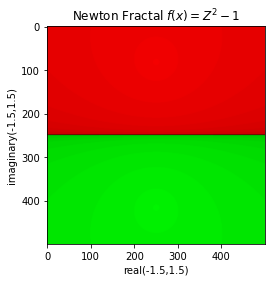

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


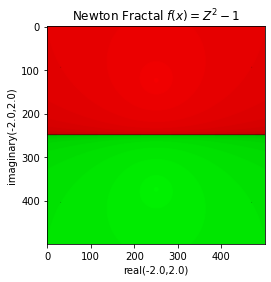

In [112]:
print("zoom in")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)

# 4. Newton iterates in the axes

In [145]:
def newtonIterates(z,f,df):
  r=[]
  i=[]
  title=str(z)
  for k in range(50):
    
    dz = df(z)
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
  plt.title('Newton iterates form $z=$'+title)
  plt.plot(r)
  plt.ylabel('Real part')
  plt.show()
  plt.plot(i)
  plt.ylabel('Imagnary part')
  plt.show()

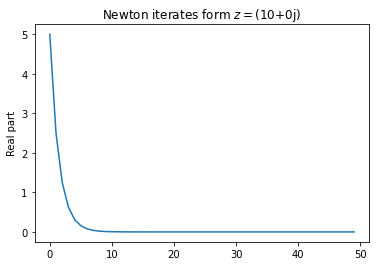

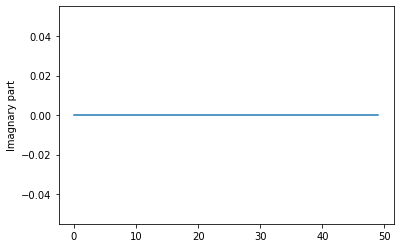

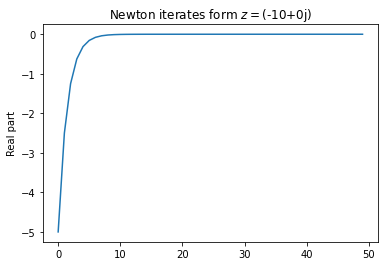

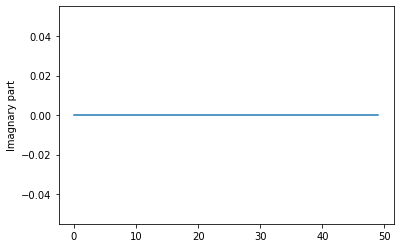

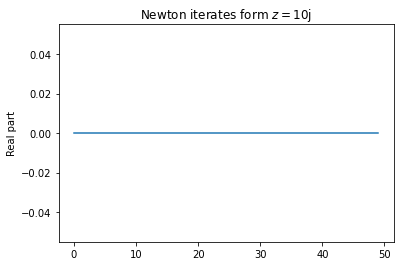

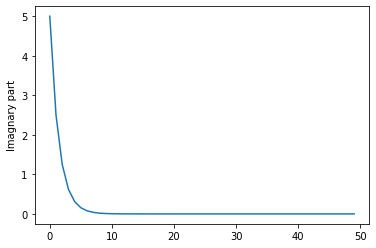

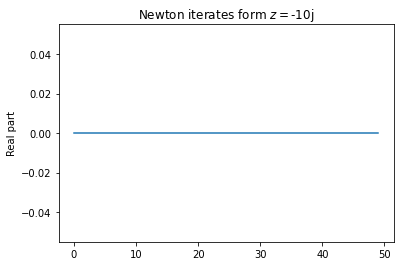

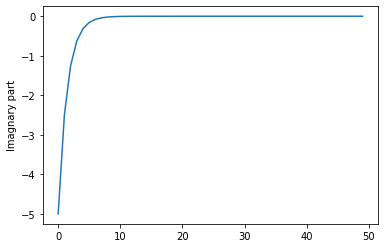

In [146]:
def f(z):
    return z ** 2 

def df(z):
    return 2 * z

newtonIterates(10+0j,f,df)
newtonIterates(-10+0j,f,df)
newtonIterates(0+10j,f,df)
newtonIterates(0-10j,f,df)

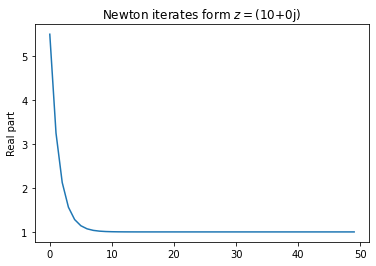

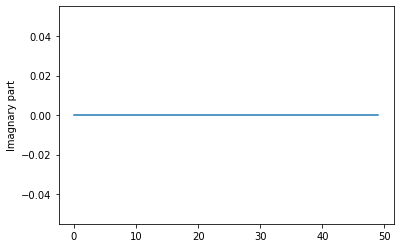

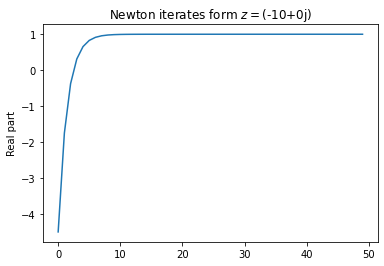

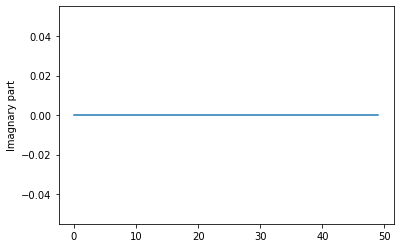

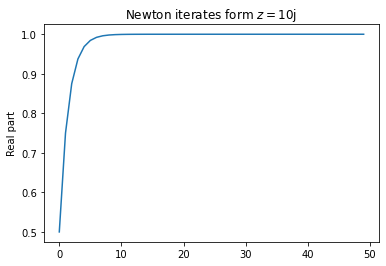

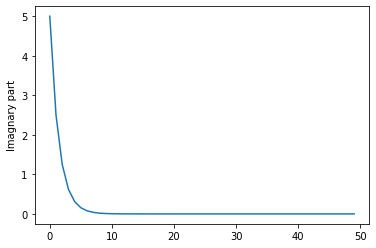

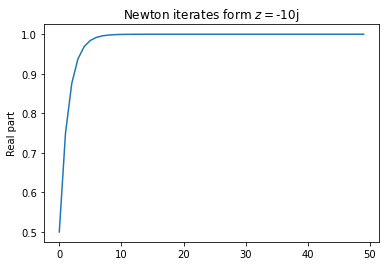

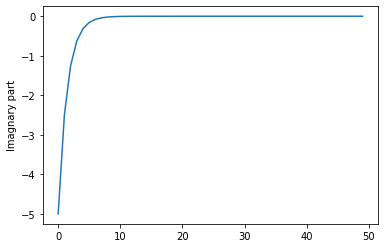

In [147]:
def f(z):
    return (z-1 )** 2 

def df(z):
    return 2 * (z-1)

newtonIterates(10+0j,f,df)
newtonIterates(-10+0j,f,df)
newtonIterates(0+10j,f,df)
newtonIterates(0-10j,f,df)

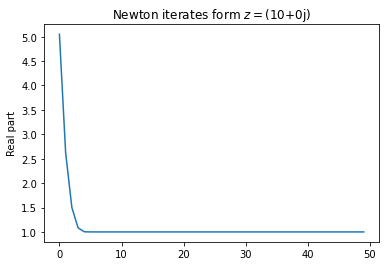

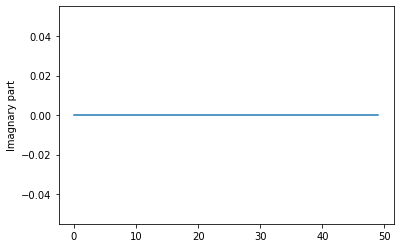

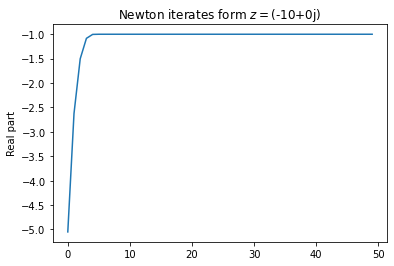

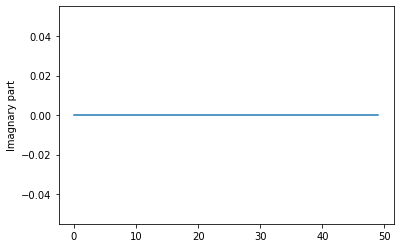

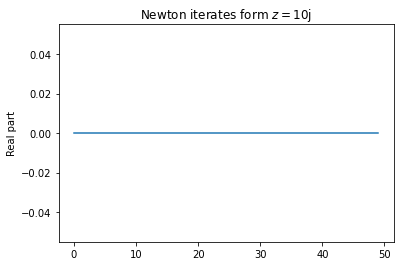

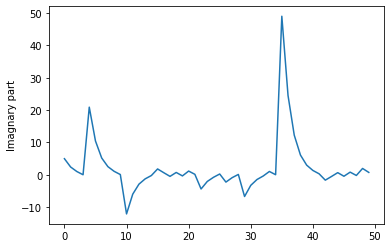

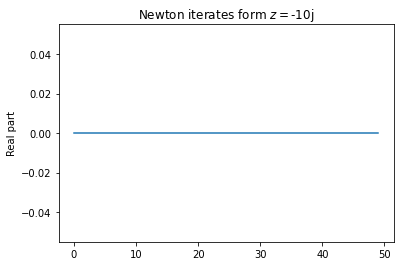

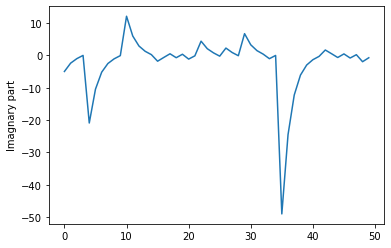

In [148]:
def f(z):
    return z** 2 -1

def df(z):
    return 2 * z

newtonIterates(10+0j,f,df)
newtonIterates(-10+0j,f,df)
newtonIterates(0+10j,f,df)
newtonIterates(0-10j,f,df)

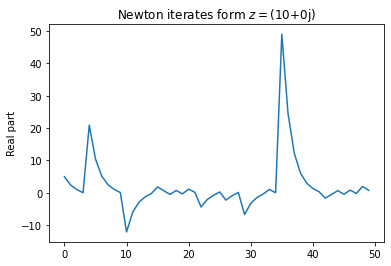

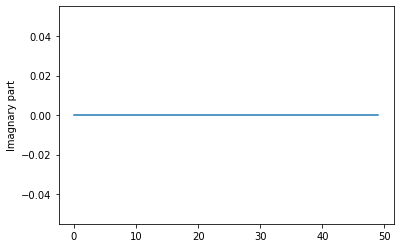

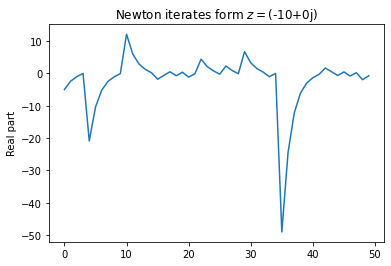

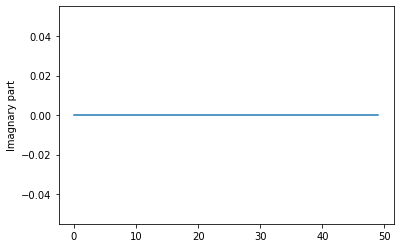

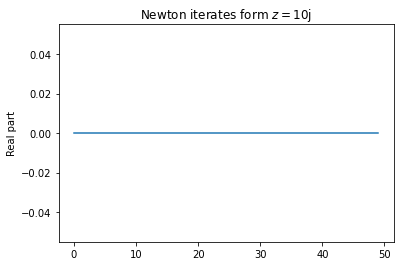

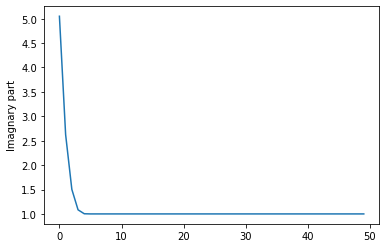

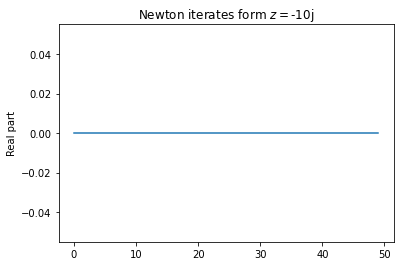

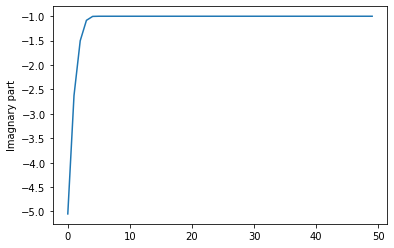

In [149]:
def f(z):
    return z** 2 +1

def df(z):
    return 2 * z

newtonIterates(10+0j,f,df)
newtonIterates(-10+0j,f,df)
newtonIterates(0+10j,f,df)
newtonIterates(0-10j,f,df)

In the graphs of the firsts two polynomals we can see that the iterations converges to a root of the polinomials, in the last two polynomials the iterations have a diferent behaivor in the imaginary axis and real axis respectively, the functions trace an irregular form and diverge. This behaivor is represented in the fractal like the limit of two regions.

# 5. Newton iterates in the diagonals

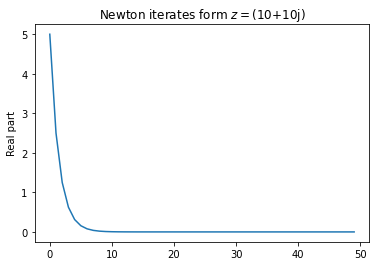

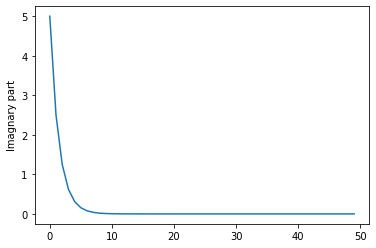

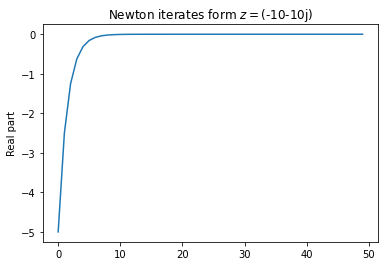

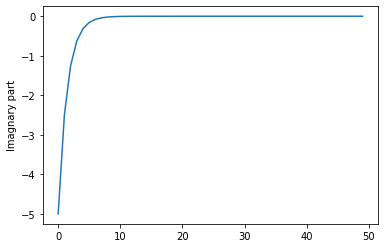

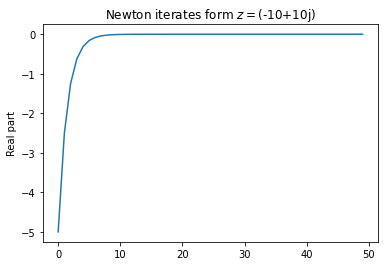

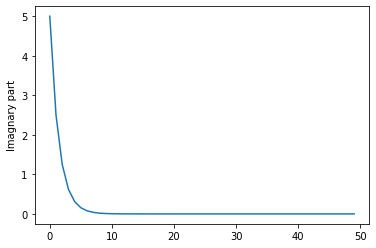

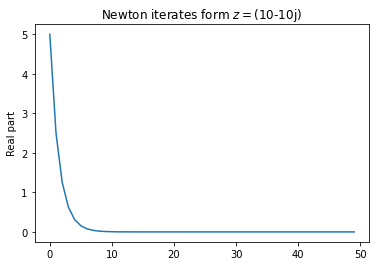

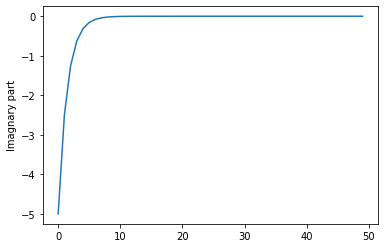

In [151]:
def f(z):
    return z ** 2 

def df(z):
    return 2 * z

newtonIterates(10+10j,f,df)
newtonIterates(-10-10j,f,df)
newtonIterates(-10+10j,f,df)
newtonIterates(10-10j,f,df)

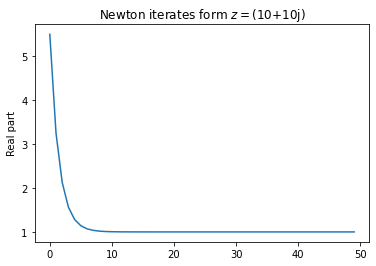

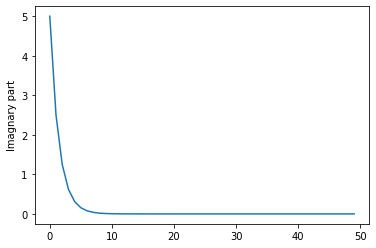

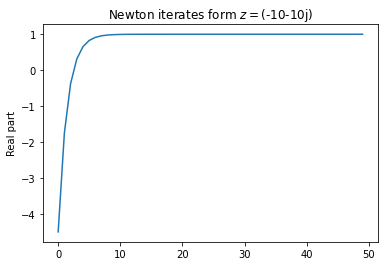

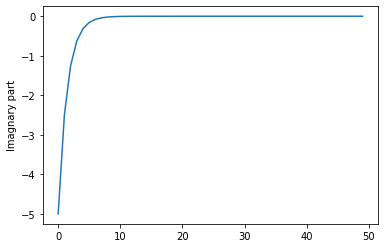

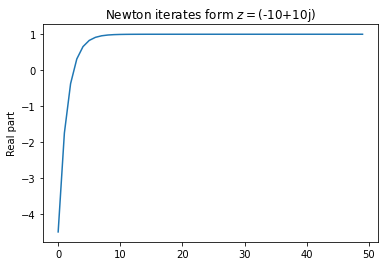

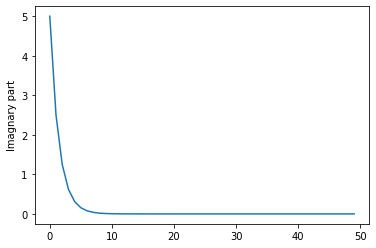

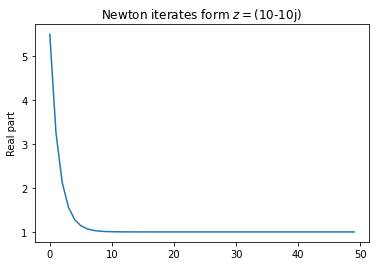

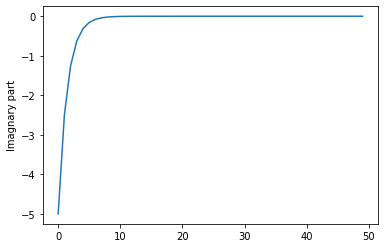

In [152]:
def f(z):
    return (z-1 )** 2 

def df(z):
    return 2 * (z-1)

newtonIterates(10+10j,f,df)
newtonIterates(-10-10j,f,df)
newtonIterates(-10+10j,f,df)
newtonIterates(10-10j,f,df)

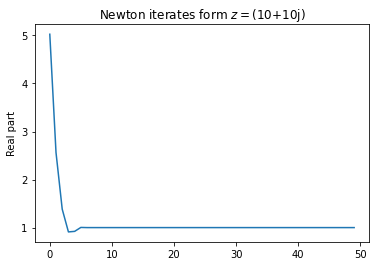

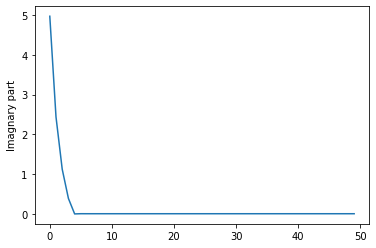

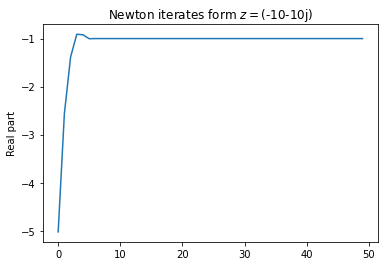

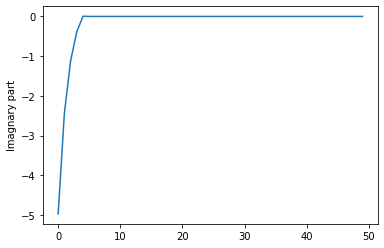

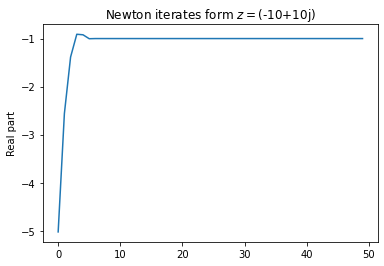

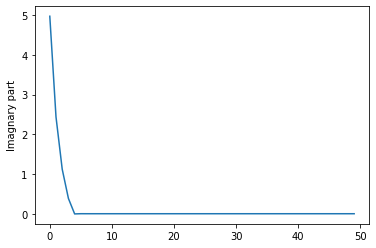

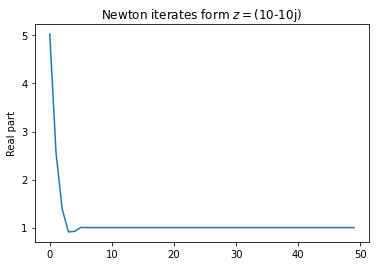

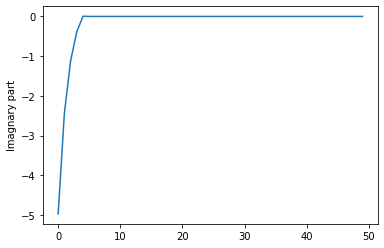

In [153]:
def f(z):
    return z** 2 -1

def df(z):
    return 2 * z

newtonIterates(10+10j,f,df)
newtonIterates(-10-10j,f,df)
newtonIterates(-10+10j,f,df)
newtonIterates(10-10j,f,df)

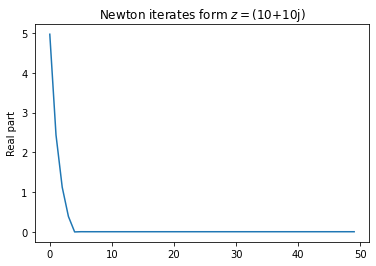

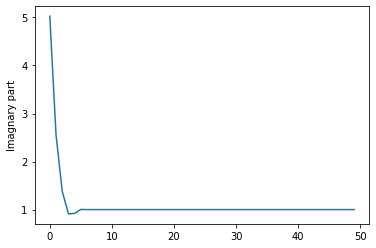

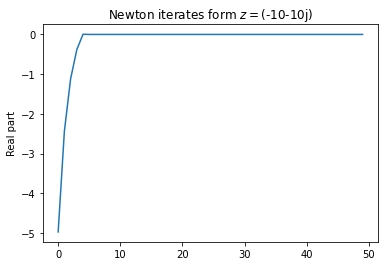

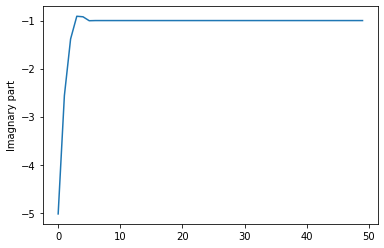

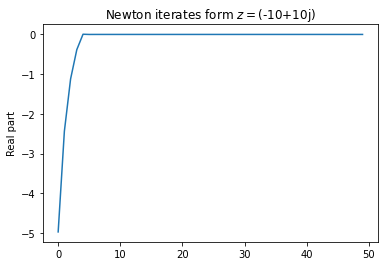

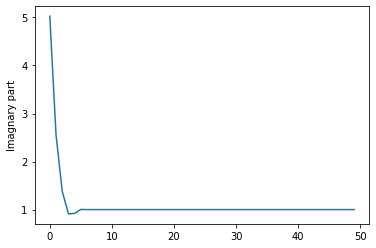

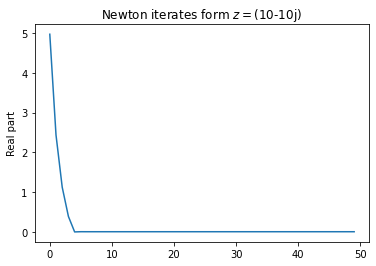

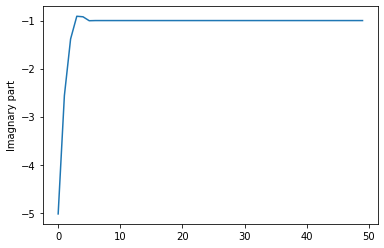

In [154]:
def f(z):
    return z** 2 +1

def df(z):
    return 2 * z

newtonIterates(10+10j,f,df)
newtonIterates(-10-10j,f,df)
newtonIterates(-10+10j,f,df)
newtonIterates(10-10j,f,df)

In [155]:
def f(z):
    return z ** 2 

def df(z):
    return 2 * z

newtonIterates(0+0j,f,df)

ZeroDivisionError: ignored

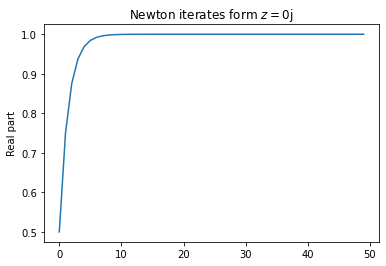

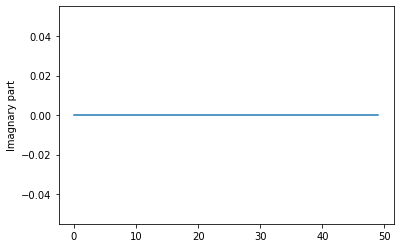

In [156]:
def f(z):
    return (z-1 )** 2 

def df(z):
    return 2 * (z-1)

newtonIterates(0+0j,f,df)

In [157]:
def f(z):
    return z** 2 -1

def df(z):
    return 2 * z

newtonIterates(0+0j,f,df)

ZeroDivisionError: ignored

In [158]:
def f(z):
    return z** 2 +1

def df(z):
    return 2 * z

newtonIterates(0+0j,f,df)

ZeroDivisionError: ignored

We can see that the derivative of 0 is 0 in all the functions except $2(z-1)$, so the newton iteration doesn't exist. I the other case converges to $1$.
In the other hand the diagonals have a similar behaivor to the axis.


